In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans
from copy import deepcopy
%matplotlib inline

rs = 42 # Global Random Seed




# Task 1. Data Preparation for Clustering.

In [2]:
## Read Dataset for Task1
df = pd.read_csv('online_shoppers_intention.csv')

## 1. Can you identify data quality issues in this dataset such as unusual data types, missing values, etc?

The Durations Columns can not be negative. Therefore, we drop the rows that contain negative value in duration columns.

In [3]:
def printColumnInfo(df):
    '''
    Display the information of this Dataframe
    '''
    
    for colName in df.columns:
        print("======================= " + str(colName) + " =======================")
        print("----------------------- FIRST FIVE -----------------------")
        print(df[colName][:5])
        print("----------------------- DESCIRBE -----------------------")
        print(df[colName].describe())
        print("----------------------- COUNTS -----------------------")
        commonList = list(df[colName].value_counts().keys())
        if len(commonList) > 100:
            print("Five Most Common: ", commonList[:5])
        else:
            print("Count List: \n", df[colName].value_counts())
        print("Num of NULL: ", df[colName].isnull().sum())

printColumnInfo(df)

======================= Administrative =======================
----------------------- FIRST FIVE -----------------------
0    0.0
1    0.0
2    0.0
3    0.0
4    0.0
Name: Administrative, dtype: float64
----------------------- DESCIRBE -----------------------
count    12316.000000
mean         2.317798
std          3.322754
min          0.000000
25%          0.000000
50%          1.000000
75%          4.000000
max         27.000000
Name: Administrative, dtype: float64
----------------------- COUNTS -----------------------
Count List: 
 0.0     5754
1.0     1354
2.0     1114
3.0      915
4.0      765
5.0      575
6.0      432
7.0      338
8.0      287
9.0      225
10.0     153
11.0     105
12.0      86
13.0      56
14.0      44
15.0      38
16.0      24
17.0      16
18.0      12
19.0       6
24.0       4
22.0       4
23.0       3
20.0       2
21.0       2
26.0       1
27.0       1
Name: Administrative, dtype: int64
Num of NULL:  14
======================= Administrative_Duration ======

In [4]:
durationCols= [  
  'Administrative_Duration',
  'Informational_Duration',
  'ProductRelated_Duration',]

In [5]:
# Removing the rows with negative duration
for colName in durationCols:
    print('Number of Negative Values: ', len(df[df[colName]<0]) )
    df = df[df[colName]>=0] 

Number of Negative Values:  33
Number of Negative Values:  0
Number of Negative Values:  0


After Removing the the negative value, the dataframe doens't contain the NULL now.

In [6]:
df.isnull().sum() # No null value

Administrative             0
Administrative_Duration    0
Informational              0
Informational_Duration     0
ProductRelated             0
ProductRelated_Duration    0
BounceRates                0
ExitRates                  0
PageValues                 0
SpecialDay                 0
Month                      0
OperatingSystems           0
Browser                    0
Region                     0
TrafficType                0
VisitorType                0
Weekend                    0
Revenue                    0
dtype: int64

// TODO: Change it after deciding the features included

Measurement Level and vriable roles:
1. Administrative -> Interval (Input)
2. Administrative_Duration -> Ratio (Input)
3. Informational -> Interval (Input)
4. Informational_Duration -> Ratio (Input)
5. ProductRelated -> Interval (Input)
6. ProductRelated_Duration -> Ratio (Input)
7. BounceRates -> Ratio (Input)
8. ExitRates -> Ratio (Input)
9. PageValues -> Ratio (Input)
10. SpecialDay -> Ratio (Input)
11. Month -> Nominal (Input)
12. OperatingSystems -> Nominal (Input)
13. Browser -> Nominal (Input)
14. Region -> Nominal (Input)
15. TrafficType -> Nominal (Input)
16. VisitorType -> Nominal (Input)
17. Weekend -> Binary (Input)
18. Revenue -> Binary (Input) - This may be the target?

In [7]:
print("Number of observations: ", len(df))

Number of observations:  12283


In [8]:
# This function can help in pre-processing and plotting
def seperateDfToNumAndCat(df):
    Cat = []
    Num = []
    for colName in df.columns:
        if (df[colName].dtype == np.float):
            Num.append(colName)
        else:
            Cat.append(colName)
            
    return {
        'Cat':Cat,
        'Num':Num
    }
seperateDfToNumAndCat(df)

{'Cat': ['Month',
  'OperatingSystems',
  'Browser',
  'Region',
  'TrafficType',
  'VisitorType',
  'Weekend',
  'Revenue'],
 'Num': ['Administrative',
  'Administrative_Duration',
  'Informational',
  'Informational_Duration',
  'ProductRelated',
  'ProductRelated_Duration',
  'BounceRates',
  'ExitRates',
  'PageValues',
  'SpecialDay']}

=================== Administrative ===================


/home/chihcheng/python3env/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


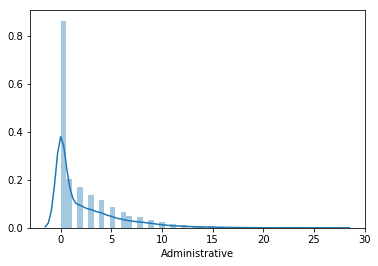

=================== Administrative_Duration ===================


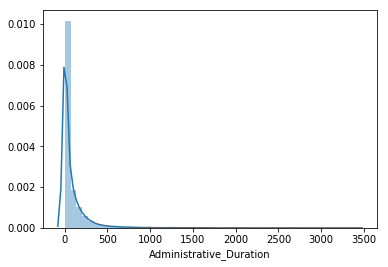

=================== Informational ===================


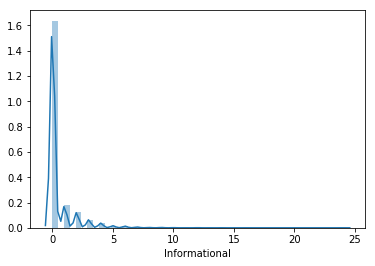

=================== Informational_Duration ===================


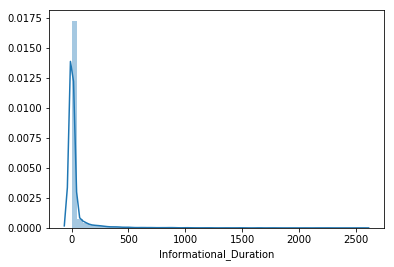

=================== ProductRelated ===================


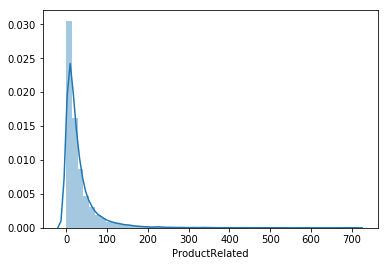

=================== ProductRelated_Duration ===================


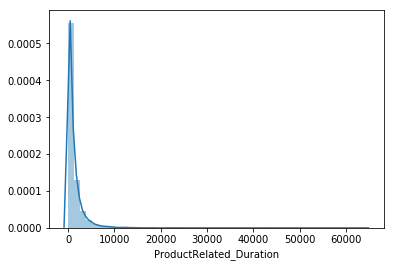

=================== BounceRates ===================


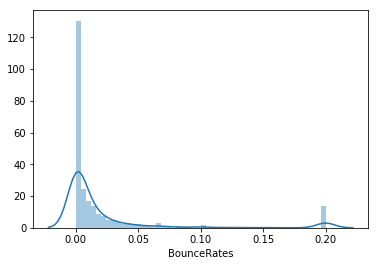

=================== ExitRates ===================


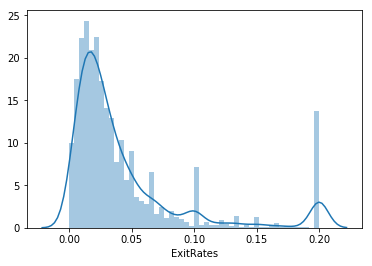

=================== PageValues ===================


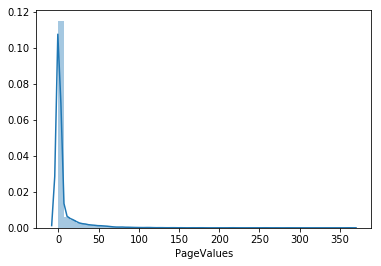

=================== SpecialDay ===================


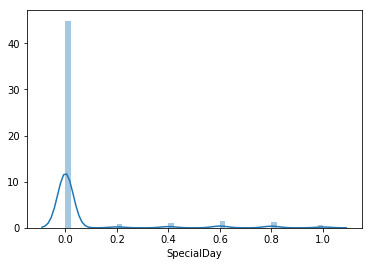

=================== Month ===================


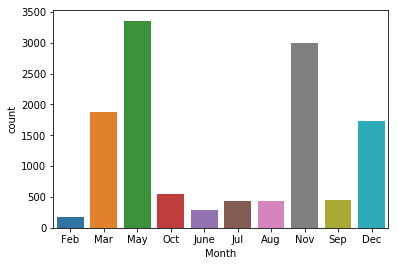

=================== OperatingSystems ===================


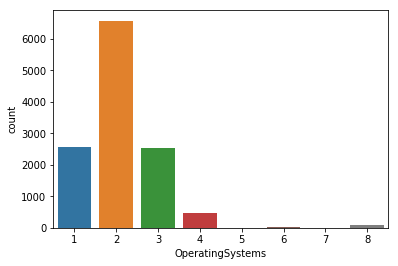

=================== Browser ===================


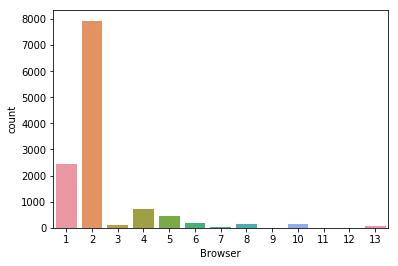

=================== Region ===================


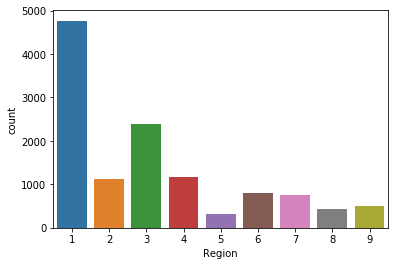

=================== TrafficType ===================


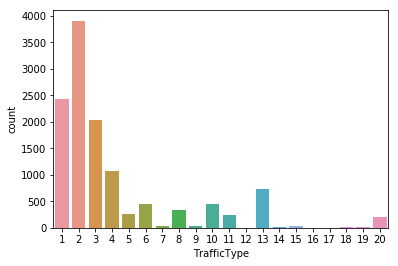

=================== VisitorType ===================


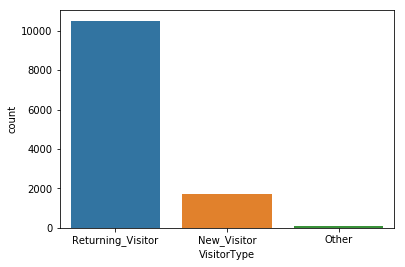

=================== Weekend ===================


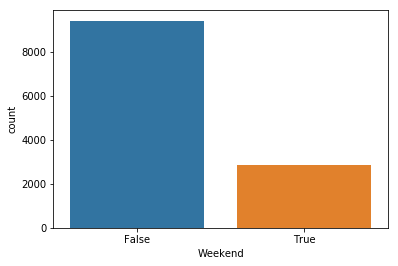

=================== Revenue ===================


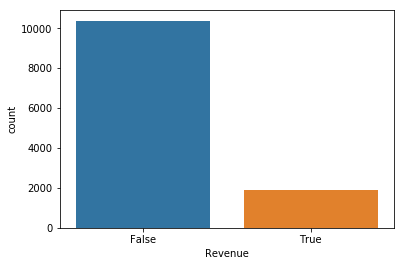

In [9]:
def plotingAllCols(df, colTypes):
    
    for colName in df.columns:
        print('===================',colName,'===================')
        if (colName in colTypes['Num']):
            sns.distplot(df[colName])
        elif (colName in colTypes['Cat']):
            sns.countplot(df[colName])
        else:
            raise ValueError
        plt.show()
plotingAllCols(df, seperateDfToNumAndCat(df))

In [10]:
# # If we have the null value in the dataset, we can use this function to fill the null

# from copy import deepcopy

# def preprocessTheNullValue(df_input, colTypes):
#     df = deepcopy(df_input)
#     for colName in df.columns:
#         ## Dealing with the Numerical first
#         if (colName in colTypes['Num']):
#             df[colName] = df[colName].astype('float')
#             if (df[colName].isnull().sum() > 0):
#                 df[colName] = df[colName].fillna(df[colName].mean())
        
#         ## Dealing with the Categorial
        
#         elif (colName in colTypes['Cat']):
#             df[colName] = df[colName].astype('category')
#             if (df[colName].isnull().sum() > 0):
#                 df[colName] = df[colName].fillna(df[colName].describe()['top'])

#     return df

# preprocessed_df = preprocessTheNullValue(df, seperateDfToNumAndCat(df))


# Task 2. The first clustering model

Q: What variables did you include in the analysis and what were their roles and
measurement level set? Justify your choice. Answer this question for each of the
tasks 2 and 3.


TODO: Fix this..

A: Since the requirement is to profile the customers through their time spending behaviour, we decide to pick the time-related attributes as the input of the clustering model, including 'Administrative','Administrative_Duration', 'Informational', 'Informational_Duration', 'ProductRelated' and 'ProductRelated_Duration'. 

In [11]:
taskOneCols = [  
  'Administrative_Duration',
  'Informational_Duration',
  'ProductRelated_Duration',]

taskTwoDf = df[taskOneCols]

Measurement Level and vriable roles:
1. Administrative -> Interval (Input)
2. Administrative_Duration -> Ratio (Input)
3. Informational -> Interval (Input)
4. Informational_Duration -> Ratio (Input)
5. ProductRelated -> Interval (Input)
6. ProductRelated_Duration -> Ratio (Input)

No Target for this clustering model

## 1. Build a clustering model to profile the customers based on the time they spend onthe website. Answer the followings:

### a. What is the optimal number of clusters? 

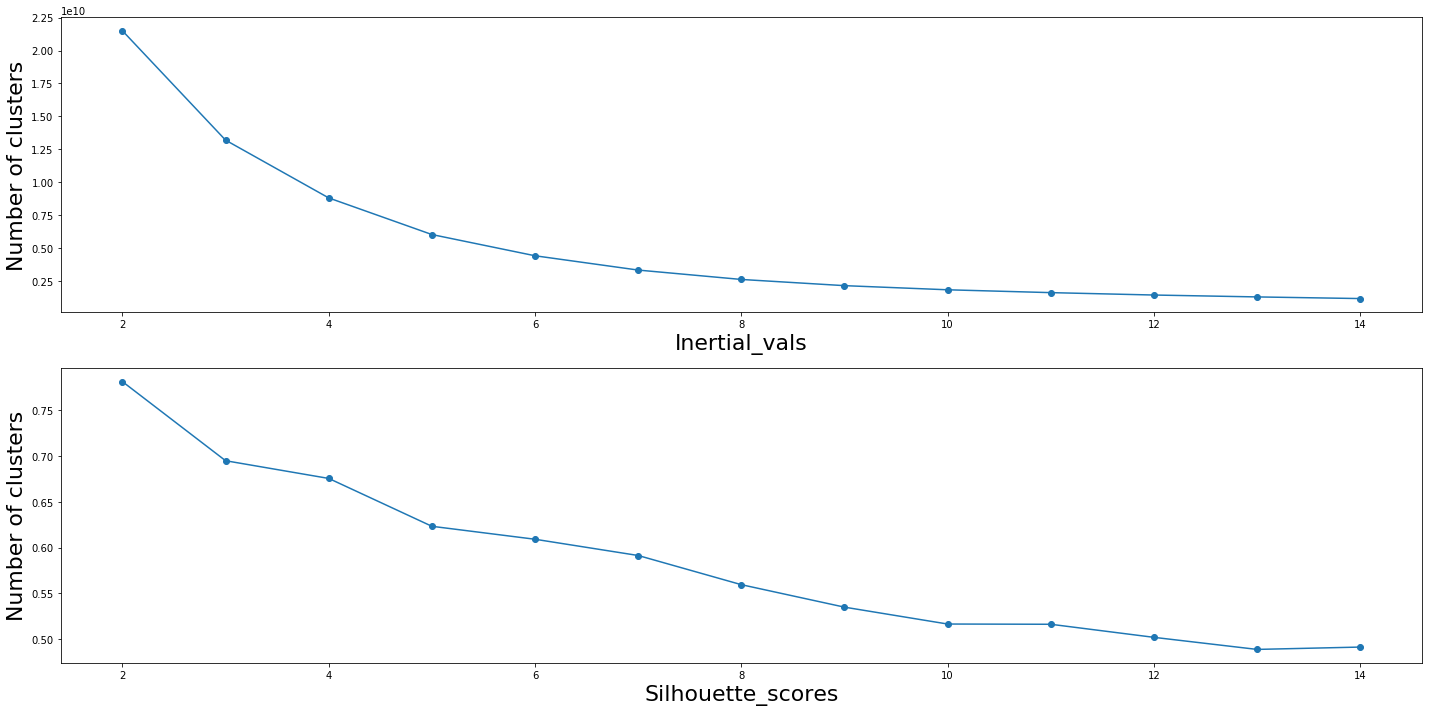

In [12]:
def ElbowEffectAndSilhouetteScore(data, kRunRange):
    clusters = []
    inertial_vals = []
    silhouette_scores = []
    
    for i in kRunRange:
        model = KMeans(n_clusters=i, random_state=rs, n_jobs=10)
        model.fit(data)
        clusters.append(model)
        inertial_vals.append(model.inertia_)
        silhouette_scores.append(silhouette_score(data, model.predict(data)))
    
    
    fig = plt.figure(figsize=(20,10))
    plt.subplot(211)
    plt.plot(kRunRange, inertial_vals, marker='o', label='Inertial_vals')
    plt.xlabel('Inertial_vals', fontsize=22)
    plt.ylabel('Number of clusters', fontsize=22)    
    
    plt.subplot(212)
    plt.plot(kRunRange, silhouette_scores, marker='o', label="silhouette_scores")
    plt.xlabel('Silhouette_scores', fontsize=22)
    plt.ylabel('Number of clusters', fontsize=22)
    
    plt.tight_layout()
    plt.show()
    
    return clusters


clusters = ElbowEffectAndSilhouetteScore(taskTwoDf, range(2,15,1))

From the plot of Elbow Effect we can find the k=3 or k=4 may be the best option of number of clusters. Then we have a look of the silhouette scores, we found out the k=3 has a slightly higher score. Therefore, we determine the number of clusters is 3.


In [13]:
### Use the cetroid distance for measuring the cluster performance

In [14]:
# from sklearn.preprocessing import StandardScaler

# # take 3 variables and drop the rest
# df2 = df[['MedHHInc', 'MeanHHSz', 'RegDens']]

# # convert df2 to matrix
# X = df2.as_matrix()

# # scaling
# scaler = StandardScaler()
# X = scaler.fit_transform(X)

In [15]:
### How can we dealing with the negative value in these 3 cols? since the duration shouldn't be -1

In [16]:
# # What variables did you include in the analysis and what were their roles and
# # measurement level set? Justify your choice. Answer this question for each of the
# # tasks 2 and 3.

# '''
# Since the first task want to cluster the customers based on the time they spend on the website. So we only contain
# the features that related to time spending on different types of page.
# '''
# taskOneIncludingCols= ['Administrative',
#   'Administrative_Duration',
#   'Informational',
#   'Informational_Duration',
#   'ProductRelated',
#   'ProductRelated_Duration',]

# # taskOneIncludingCols= [
# #   'Administrative_Duration',
# #   'Informational_Duration',
# #   'ProductRelated_Duration',]


# taskOneDf = preprocessed_df[taskOneIncludingCols]

### b. For the model with the optimal number of clusters, list the variables that were found important in determining the clusters?


Best Model Clusters k = 3
Value counts: 
 2    10101
0     1975
1      207
Name: Cluster_ID, dtype: int64


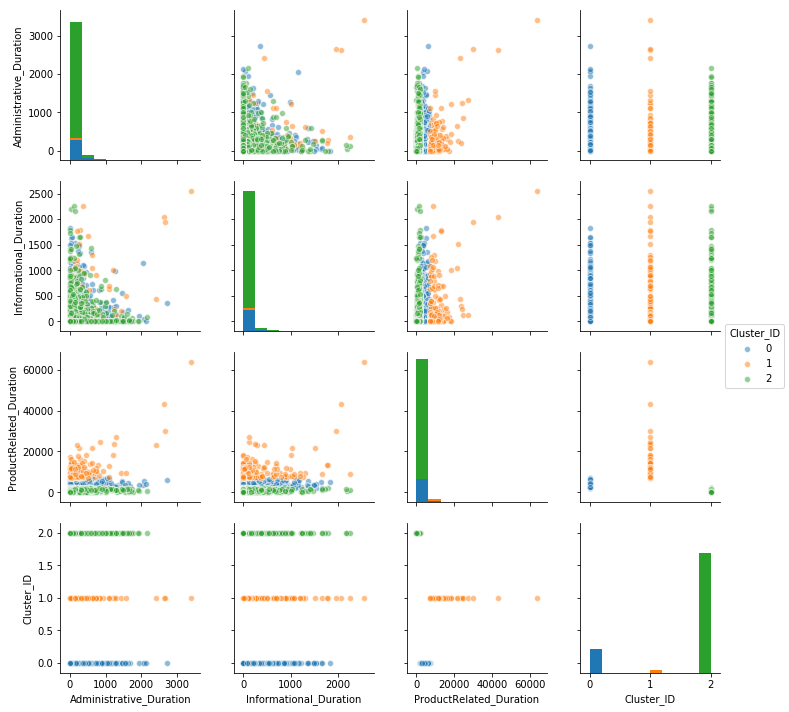

In [17]:
print("Best Model Clusters k =",clusters[1].n_clusters)

# TODO: have to take another visualization method

def pairplotVisualization(df, model):
    df_WithID = deepcopy(df)
    df_WithID['Cluster_ID'] = model.predict(df)
    print('Value counts: \n',df_WithID['Cluster_ID'].value_counts())
    sns.pairplot(df_WithID, hue='Cluster_ID', plot_kws={'alpha':0.5})

# taskTwoDf_1_WithID = deepcopy(taskTwoDf_1)
# taskTwoDf_1_WithID['Cluster_ID'] = clusters[1].predict(taskTwoDf_1)
# print('Value counts: \n',taskTwoDf_1_WithID['Cluster_ID'].value_counts())
# sns.pairplot(taskTwoDf_1_WithID, hue='Cluster_ID', plot_kws={'alpha':0.5})

pairplotVisualization(taskTwoDf ,clusters[1])

In [18]:
def calculateFeatureDifference(centers):
    
    numClusters, numFeatures = centers.shape
    
    dif = []
    
    for i in range(numFeatures):
        feature_dif = 0
        for j in range(numClusters):
            for k in range(j+1, numClusters):
                feature_dif+= abs(centers[j, i] - centers[k,i])
        dif.append(feature_dif)
        
    return dif

calculateFeatureDifference(clusters[1].cluster_centers_)

[466.0985735326164, 493.3365836192419, 20613.91886108766]

From the visualization and the calculateFeatureDifferenc function, we found the 3rd feature (ProductRelated_Duration) is the most informative feature in this cluster model since it can appropriately seperate the three different cluster. Moreover, the 3 clusters centroids has the largest difference on the 3rd dimension (ProductRelated_Duration). Therefore, ProductRelated_Duration is the most important in determining the clusters.
  

### c. Explain the cluster results.

In [19]:
# Display the label of the clusters
count_dict = dict(pd.DataFrame(clusters[1].labels_)[0].value_counts())

In [20]:
# Since the result may vary everytime, we wrote a function to display it.

def displayClusterResult(model):
    count_dict = dict(pd.DataFrame(model.labels_)[0].value_counts())
    sorted_countDict = sorted(count_dict.items(), key=lambda item: item[1])
    k = model.n_clusters
    print("The k =",k,"clustering model seperate all the observations to",k ,"clusters. Cluster",
        sorted_countDict[-1][0], "is the largest cluster, which consists of ",
        sorted_countDict[-1][1],
        "objects. And the the Cluster", sorted_countDict[0][0],
        "is the samllest cluster, which only own ",
        sorted_countDict[0][1],
        " objects. And the centroids of these three clusters are located at",
        str(model.cluster_centers_[0]), ',', str(
            model.cluster_centers_[1]),
        'and', str(model.cluster_centers_[2]),
        '. The Sum of squared distance of objects to their closest centroid is ',
        model.inertia_,'. Moreover, to get this result, the model runs',
        model.n_iter_,'iteration.' )

In [21]:
displayClusterResult(clusters[1])

The k = 3 clustering model seperate all the observations to 3 clusters. Cluster 2 is the largest cluster, which consists of  10101 objects. And the the Cluster 1 is the samllest cluster, which only own  207  objects. And the centroids of these three clusters are located at [ 154.87747813   84.67261984 3355.10746367] , [  295.36489079   266.72309447 10886.17436548] and [ 62.31560402  20.05480266 579.21493494] . The Sum of squared distance of objects to their closest centroid is  13185315708.802977 . Moreover, to get this result, the model runs 29 iteration.


## 2. What is the effect of using the standardization method on the model above? Does the variable normalization process enable a better clustering solution?

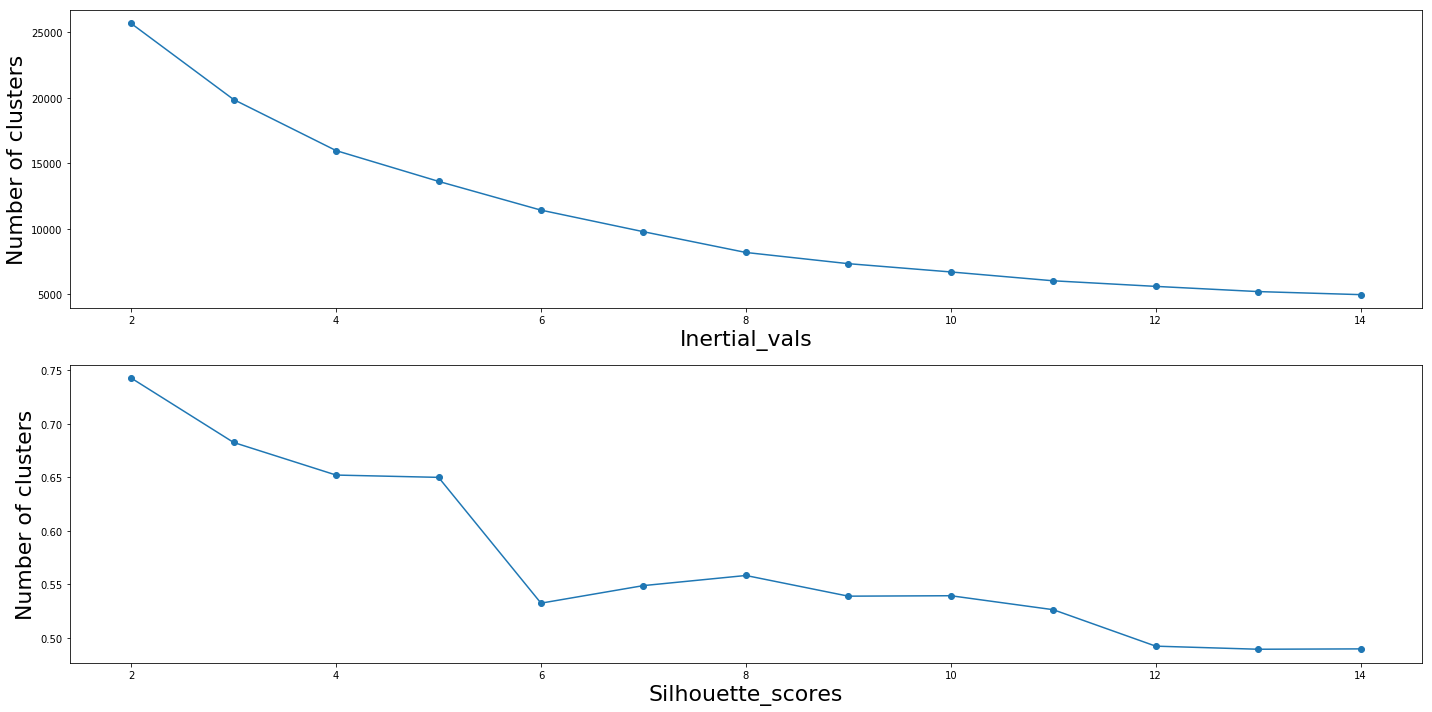

In [22]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
taskTwoDf_Standardised = scaler.fit_transform(taskTwoDf)
taskTwoDf_Standardised = pd.DataFrame(taskTwoDf_Standardised, columns= taskTwoDf.columns)

clusters_Standardised = ElbowEffectAndSilhouetteScore(taskTwoDf_Standardised, range(2,15,1))

From the Elbow Effect, we can find that the stadardised clusters have more gradual decline curve than the original one, which means the number of clusters doesn't have a strong impact as the original model. Moreover, the silhouette scores also show a differnet curve in the standardised model. These factors may affect the decision of k.

Value counts: 
 1    10902
0     1194
2      187
Name: Cluster_ID, dtype: int64


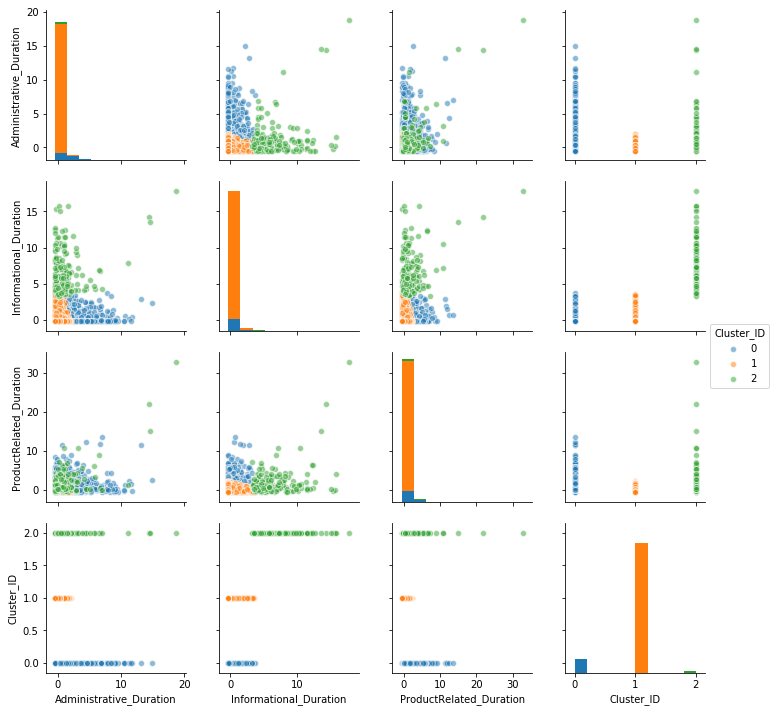

In [23]:
# If we still the k = 3
pairplotVisualization(taskTwoDf_Standardised, clusters_Standardised[1])

From the pairplot visualization, we can see the distribution of each cluster become different. In this model, we can seperate the objects easily in all the features, except the cluster 0 and cluster 1 in informational_Duration feature. In this model, each cluster has a strong character and unique distribution. Therefore, the standardised input results in a better solution in this case.

In [24]:
calculateFeatureDifference(clusters_Standardised[1].cluster_centers_)

[4.004705793981389, 13.373080638205202, 4.0830708223043874]

The standardised model also different from the original in the distance of centroids. The original model has the largest distance in the ProductRelated_Duration feature. However, the standardised has the largest distance in the Informational_Duration.

In [25]:
displayClusterResult(clusters_Standardised[1])

The k = 3 clustering model seperate all the observations to 3 clusters. Cluster 1 is the largest cluster, which consists of  10902 objects. And the the Cluster 2 is the samllest cluster, which only own  187  objects. And the centroids of these three clusters are located at [1.78843011 0.3419077  1.58146492] , [-0.21392278 -0.14957353 -0.20471064] and [1.05240988 6.53696679 1.83682478] . The Sum of squared distance of objects to their closest centroid is  19875.616386269867 . Moreover, to get this result, the model runs 18 iteration.


## 3. Interpret the cluster analysis outcome. In other words, characterize the nature of each cluster by giving it a descriptive label and a brief description. 

// The Question 3 is based on the result of Q2 or Q1?

3. Interpret the cluster analysis outcome. In other words, characterize the nature of
each cluster by giving it a descriptive label and a brief description. 

Value counts: 
 2    10101
0     1975
1      207
Name: Cluster_ID, dtype: int64


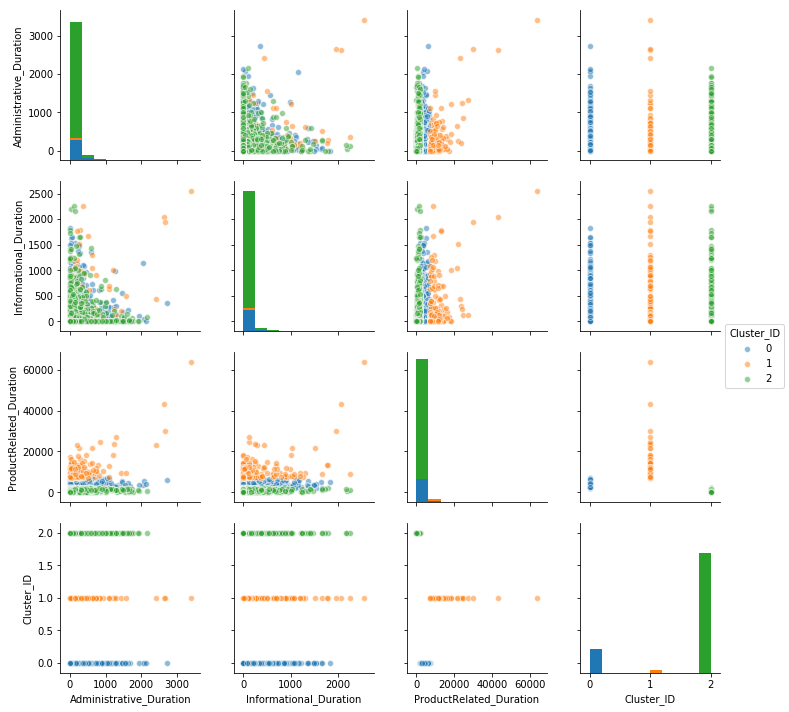

In [26]:
pairplotVisualization( taskTwoDf,clusters[1])

Cluster_1 (Blue): This cluster consist of the most of the observations. Number of objects in this cluster is 10138. This cluster has a Informational_Duration. And, the feature of this cluter is the least ProductRelated_Duration. The Administrative_Duration feature in this cluster is compact, most of the instances are in the range of 0 to 2000.


Cluster_2 (Green): This cluster is the second large group, which has 1973 objects. It has the wider range that Cluster_1 in Administrative_Duration. However, most of the objects is still in the range of 0 to 2000. In terms of the Informational_Duration, this cluster has the least value and samllest range. Moreover, this cluster also has a small value of ProductRelated_Duration but slightly larger than Cluster_1.


Cluster_3 (Red): This cluster has the smallest group, which consist of only 205 objects. This cluster has the widest range and highest value in all the three features. In the Administrative_Duration, even this cluster has the widest range, most of the instances exist in the range of 0 to 1500.


# Task 3. Refining the clustering model 

## 1. Add more information such as where the users come from and when they access the website, to the clustering analysis that you have conducted in the previous task. Answer the followings:

Question: What variables did you include in the analysis and what were their roles and
measurement level set? Justify your choice. Answer this question for each of the
tasks 2 and 3.

Answer: We found all the feature can be informative; therefore, we decide to include all the features for this clustering task.

In [27]:
taskThreeDf = deepcopy(df)
taskThreeDf = pd.get_dummies(taskThreeDf)

// TODO: Change it after deciding the features included

Measurement Level and vriable roles:
1. Administrative -> Interval (Input)
2. Administrative_Duration -> Ratio (Input)
3. Informational -> Interval (Input)
4. Informational_Duration -> Ratio (Input)
5. ProductRelated -> Interval (Input)
6. ProductRelated_Duration -> Ratio (Input)
7. BounceRates -> Ratio (Input)
8. ExitRates -> Ratio (Input)
9. PageValues -> Ratio (Input)
10. SpecialDay -> Ratio (Input)
11. Month -> Nominal (Input)
12. OperatingSystems -> Nominal (Input)
13. Browser -> Nominal (Input)
14. Region -> Nominal (Input)
15. TrafficType -> Nominal (Input)
16. VisitorType -> Nominal (Input)
17. Weekend -> Binary (Input)
18. Revenue -> Binary (Input) - This may be the target?

In [28]:
print('All',len(taskThreeDf.columns),'Features:\n', list(taskThreeDf.columns))

All 29 Features:
 ['Administrative', 'Administrative_Duration', 'Informational', 'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration', 'BounceRates', 'ExitRates', 'PageValues', 'SpecialDay', 'OperatingSystems', 'Browser', 'Region', 'TrafficType', 'Weekend', 'Revenue', 'Month_Aug', 'Month_Dec', 'Month_Feb', 'Month_Jul', 'Month_June', 'Month_Mar', 'Month_May', 'Month_Nov', 'Month_Oct', 'Month_Sep', 'VisitorType_New_Visitor', 'VisitorType_Other', 'VisitorType_Returning_Visitor']


### a. What is the optimal number of clusters? 

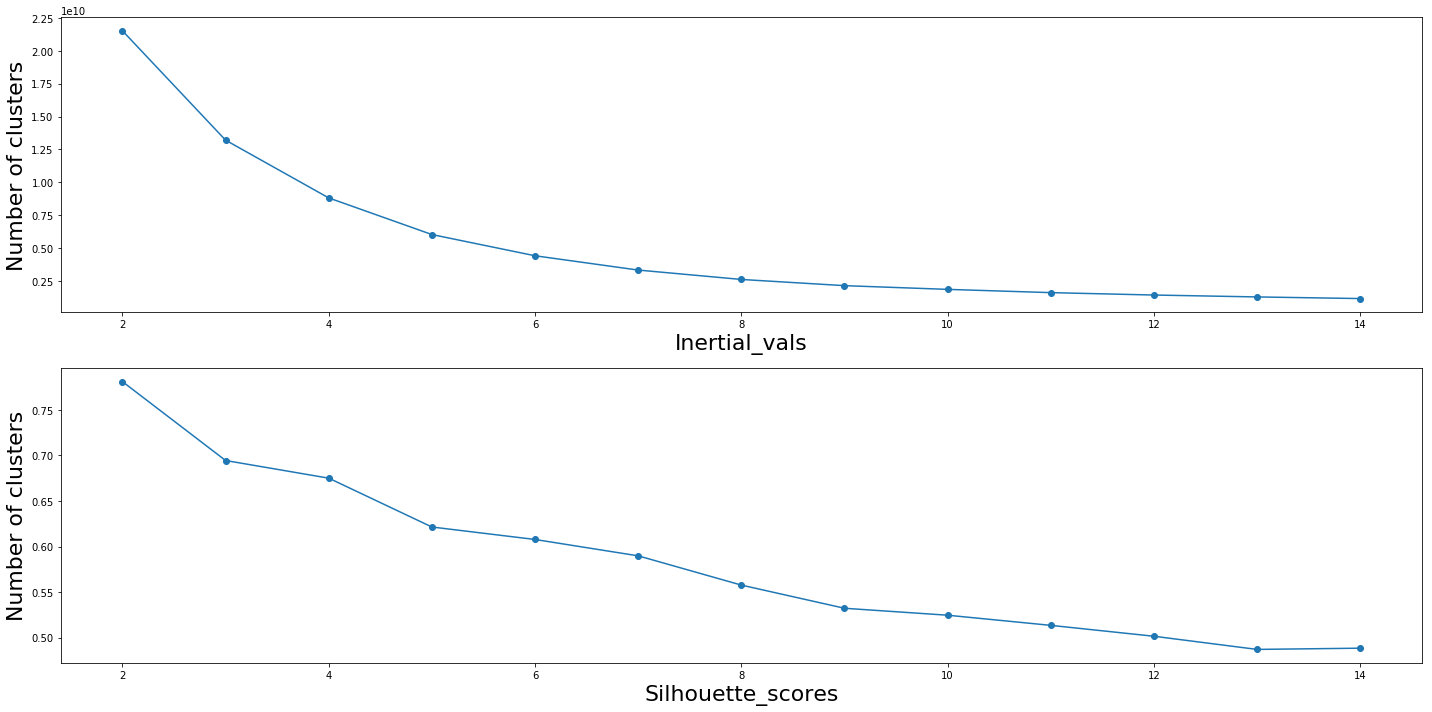

In [46]:
refinedClusters = ElbowEffectAndSilhouetteScore(taskThreeDf, range(2,15,1))

From the plot of Elbow Effect, we can find the Elbow at k=3 or k=4. And, the silhouette scores tell us the k = 3 is better match to its own cluster. Hence, we pick k = 3 for this case.

In [47]:
### b. Whether this model has different variable importance than the previous model (Task 2.1)?

In [48]:
taskThreeDf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12283 entries, 0 to 12329
Data columns (total 29 columns):
Administrative                   12283 non-null float64
Administrative_Duration          12283 non-null float64
Informational                    12283 non-null float64
Informational_Duration           12283 non-null float64
ProductRelated                   12283 non-null float64
ProductRelated_Duration          12283 non-null float64
BounceRates                      12283 non-null float64
ExitRates                        12283 non-null float64
PageValues                       12283 non-null float64
SpecialDay                       12283 non-null float64
OperatingSystems                 12283 non-null int64
Browser                          12283 non-null int64
Region                           12283 non-null int64
TrafficType                      12283 non-null int64
Weekend                          12283 non-null uint8
Revenue                          12283 non-null uint8
Month_A

In [49]:
taskThreeDf['Weekend'].dtype

dtype('uint8')

In [50]:
taskThreeDf.columns

Index(['Administrative', 'Administrative_Duration', 'Informational',
       'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration',
       'BounceRates', 'ExitRates', 'PageValues', 'SpecialDay',
       'OperatingSystems', 'Browser', 'Region', 'TrafficType', 'Weekend',
       'Revenue', 'Month_Aug', 'Month_Dec', 'Month_Feb', 'Month_Jul',
       'Month_June', 'Month_Mar', 'Month_May', 'Month_Nov', 'Month_Oct',
       'Month_Sep', 'VisitorType_New_Visitor', 'VisitorType_Other',
       'VisitorType_Returning_Visitor'],
      dtype='object')

In [51]:
taskThreeDf['Weekend'] = taskThreeDf['Weekend'].astype('uint8')
taskThreeDf['Revenue'] = taskThreeDf['Revenue'].astype('uint8')

Value counts: 
 2    10101
0     1975
1      207
Name: Cluster_ID, dtype: int64


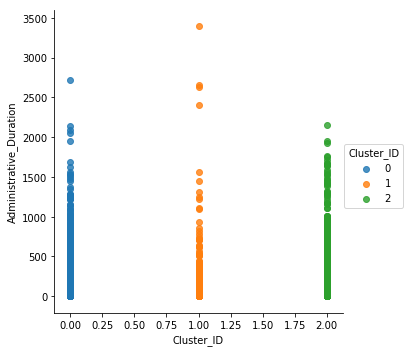

In [59]:
# Try to use the 0.9.0 to do scatter plot
df_WithID = deepcopy(taskThreeDf)
df_WithID['Cluster_ID'] = refinedClusters[1].predict(taskThreeDf)
print('Value counts: \n',df_WithID['Cluster_ID'].value_counts())
sns.lmplot(x='Cluster_ID', y='Administrative_Duration' ,hue= 'Cluster_ID', scatter=True,fit_reg=False, data=df_WithID)

Value counts: 
 2    10101
0     1975
1      207
Name: Cluster_ID, dtype: int64


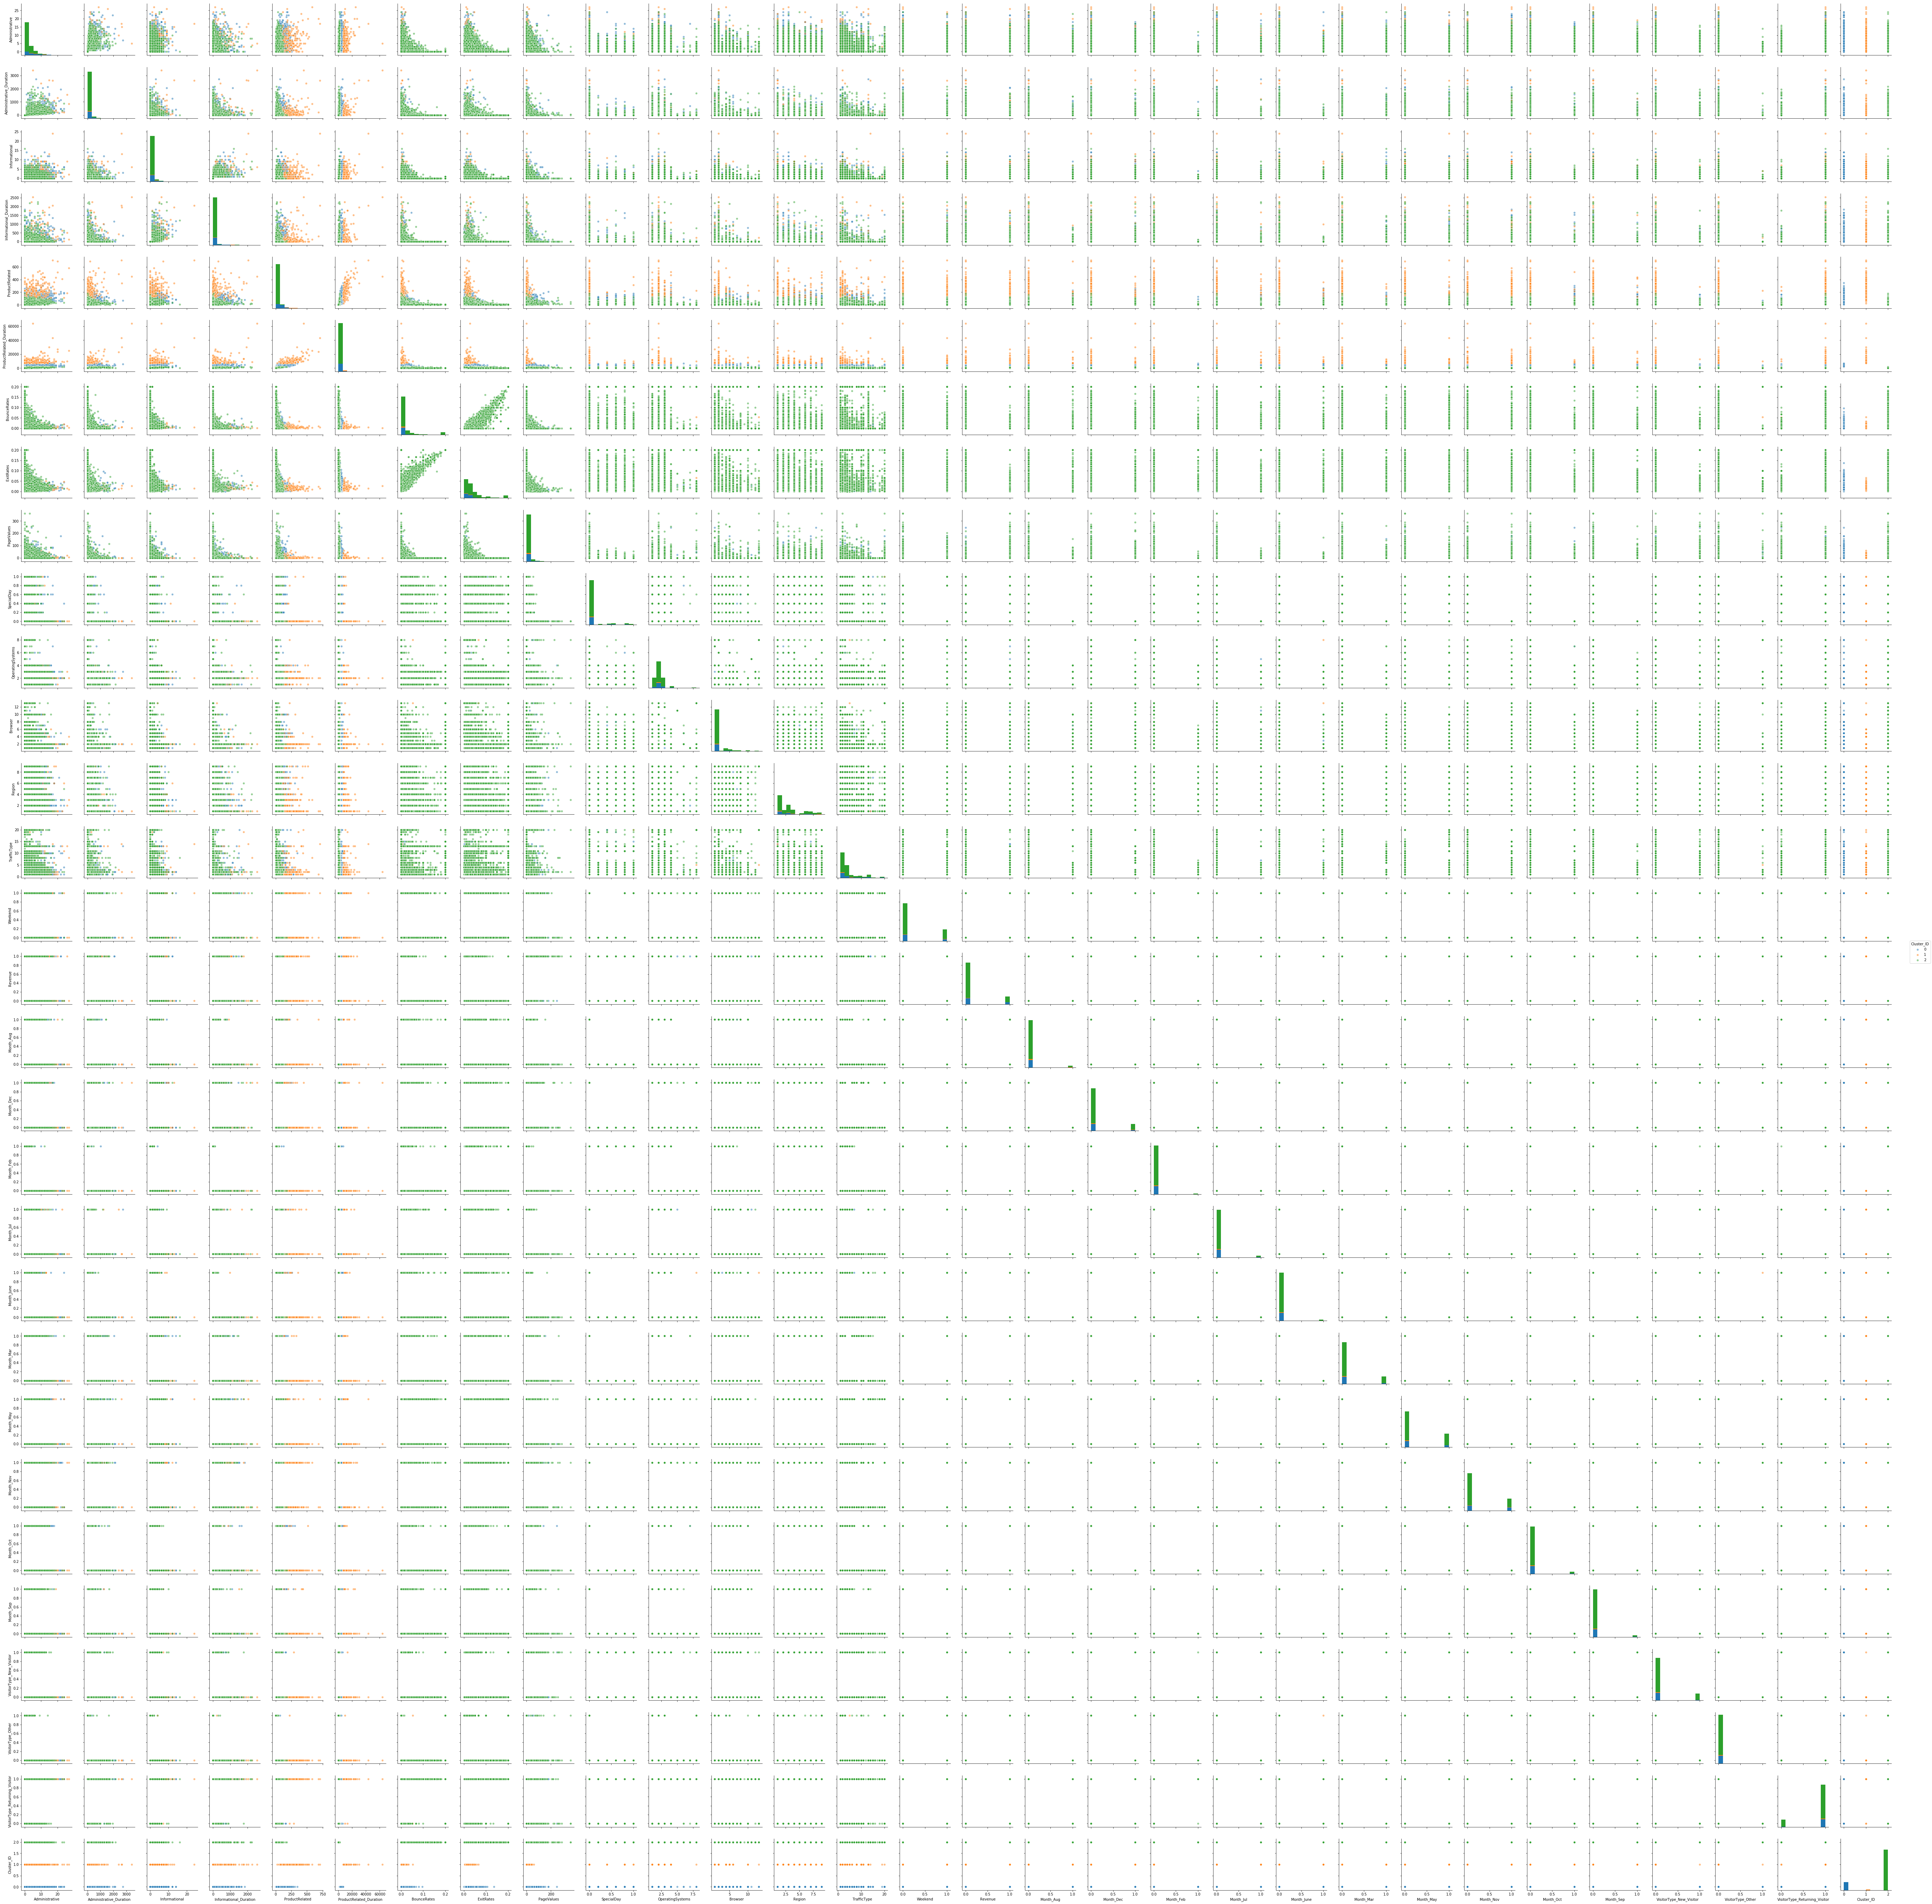

In [52]:
# How can I do the visualization for this?

calculateFeatureDifference(refinedClusters[1].cluster_centers_)
pairplotVisualization(taskThreeDf,refinedClusters[1])
# g = sns.pairplot(..., size=10, aspect=0.6)
# use box plot or other

In [ ]:
!pip3 install numpy

In [ ]:
pip install --upgrade pip

In [ ]:
!pip3 install numpy

From the plot of Elbow Effect we can find the k=3 or k=4 may be the best option of number of clusters. Then we have a look of the silhouette scores, we found out the k=3 has a slightly higher score. Therefore, we determine the number of clusters is 3.


b. For the model with the optimal number of clusters, list the variables that
were found important in determining the clusters?  

Q: What's the vraibles mean? the features or the inertial_vals and silhouette_scores?

In [ ]:
!pip3 install numpy

In [ ]:
np.__version__

In [ ]:


# From this we can know the the feature 3 has the largest distance between 3 centres

In [ ]:
list(range(5,6))

In [ ]:
clusters[1].cluster_centers_.shape

c. Explain the cluster results. Q: show I use the plot to explain?

3. Interpret the cluster analysis outcome. In other words, characterize the nature of
each cluster by giving it a descriptive label and a brief description. 

In [ ]:
taskOneIncludingCols= [
    'Administrative',
  'Administrative_Duration',
    'Informational',
  'Informational_Duration',
    'ProductRelated'
  'ProductRelated_Duration']


In [ ]:
print("Best Model Clusters k =",clusters[1].n_clusters)

# TODO: have to take another visualization method
taskOneDfWithID = deepcopy(taskOneDf)
taskOneDfWithID['Cluster_ID'] = clusters[1].predict(taskOneDf)
print('Value counts: \n',taskOneDfWithID['Cluster_ID'].value_counts())
sns.pairplot(taskOneDfWithID, hue='Cluster_ID', plot_kws={'alpha':0.5})

2. What is the effect of using the standardization method on the model above? Does
the variable normalization process enable a better clustering solution

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

taskOneDfStandardized = scaler.fit_transform(taskOneDf)
clustersStandardised = ElbowEffectAndSilhouetteScore(taskOneDfStandardized, range(2,15,1))

In [ ]:
clustersStandardised = ElbowEffectAndSilhouetteScore(taskOneDfStandardized, range(2,15,1))

In [ ]:
## Q: How can I know which one is better?

A: If we just measuring the the goodness from the Elbow Effect, we can find that the stadardised clusters have more gradual decline curve than the original one, which means the number of clusters doesn't have a strong impact as the original model. Moreover, the silhouette scores also show the k=4 and k=6 have similar values in the standardised model. These factors may affect the decision of k.

3. Interpret the cluster analysis outcome. In other words, characterize the nature of
each cluster by giving it a descriptive label and a brief description. 

In [ ]:
clustersAllInfo = ElbowEffectAndSilhouetteScore(pd.get_dummies(preprocessed_df),  range(2,15,2))

In [ ]:
scaler = StandardScaler()

preprocessed_df_standardised = scaler.fit_transform(pd.get_dummies(preprocessed_df))

In [ ]:
clustersAllInfo_standardised = ElbowEffectAndSilhouetteScore(preprocessed_df_standardised,  range(2,15,2))

Decision Making: Finally, could you detail - how the outcome of clustering analysis can
be used by decision makers?

In [ ]:
!ls

In [ ]:
##### Text Mining

In [ ]:
import glob

In [ ]:
path = 'text-files-to-mine/*.txt'
files = glob.glob(path)

In [ ]:
allText = []
for name in files:
    with open(name) as f:
        allText.append(f.read()) # .split("\n\n")

In [ ]:
files[0]

In [ ]:
allText[0]

In [ ]:
import string

from nltk.corpus import stopwords as sw
from nltk.corpus import wordnet as wn
from nltk import wordpunct_tokenize
from nltk import WordNetLemmatizer
from nltk import sent_tokenize
from nltk import pos_tag

In [ ]:
lemmatizer = WordNetLemmatizer()
punct = set(string.punctuation)

In [ ]:
def lemmatize(token, tag):
    tag = {
        'N': wn.NOUN,
        'V': wn.VERB,
        'R': wn.ADV,
        'J': wn.ADJ
    }.get(tag[0], wn.NOUN)

    return lemmatizer.lemmatize(token, tag)

In [ ]:
stopwords = sw.words('english')

In [ ]:
def cab_tokenizer(document):
    # initialize token list
    tokens = []
    
    # split the document into sentences
    for sent in sent_tokenize(document):
        # split the document into tokens and then create part of speech tag for each token
        for token, tag in pos_tag(wordpunct_tokenize(sent)):
            # preprocess and remove unnecessary characters
            token = token.lower()
            token = token.strip()
            token = token.strip('_')
            token = token.strip('*')

            # If stopword, ignore token and continue
            if token in stopwords:
                continue

            # If punctuation, ignore token and continue
            if all(char in punct for char in token):
                continue

            # Lemmatize the token and add back to the tokens list
            lemma = lemmatize(token, tag)
            tokens.append(lemma)
    
    return tokens

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

# tf idf vectoriser
tfidf_vec = TfidfVectorizer(tokenizer=cab_tokenizer, ngram_range=(1,2))
X = tfidf_vec.fit_transform(allText)

# see the number of unique tokens produced by the vectorizer. Lots of them...
print(len(tfidf_vec.get_feature_names()))

In [ ]:
import nltk

In [ ]:
from sklearn.cluster import KMeans

# K means clustering using the term vector
kmeans = KMeans(n_clusters=7, random_state=rs).fit(X)

In [ ]:
def visualise_text_cluster(n_clusters, cluster_centers, terms, num_word = 5):
    # -- Params --
    # cluster_centers: cluster centers of fitted/trained KMeans/other centroid-based clustering
    # terms: terms used for clustering
    # num_word: number of terms to show per cluster. Change as you please.
    
    # find features/terms closest to centroids
    ordered_centroids = cluster_centers.argsort()[:, ::-1]
    
    for cluster in range(n_clusters):
        print("Top terms for cluster #{}:".format(cluster), end=" ")
        for term_idx in ordered_centroids[cluster, :num_word]:
            print(terms[term_idx], end=', ')
        print()
        
# call it
visualise_text_cluster(kmeans.n_clusters, kmeans.cluster_centers_, tfidf_vec.get_feature_names())

In [ ]:
len(allText)

In [ ]:
text_clusters = ElbowEffectAndSilhouetteScore(X, range(2,200, 5))

1. What variables did you include in the analysis and what were their roles and
measurement level set? Justify your choice.

The input is the tf-idf vetor, which has 36360 dimensions for each document.
Each token is consist of one or two words, which are unigram and bigram. The unigram token can provide the information of sigle word. And the bigram tokens can provide the information of phrses.


Q: Can you identify data quality issues in order to perform text mining?

In [ ]:
#  What can be the data quality issue?

3. Based on the ZIPF plot, list the top 10 terms that will be least useful for clustering purpose. 

Should I select the one with the df and tf = 1? or the top df? So I can only find the term on the plot?

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# creating tf-idf terms - a bit slow, do it occasionaly
def calculate_tf_idf_terms(document_col):
    # Param - document_col: collection of raw document text that you want to analyse
    from sklearn.feature_extraction.text import CountVectorizer

    # use count vectorizer to find TF and DF of each term
    count_vec = CountVectorizer(tokenizer=cab_tokenizer, ngram_range=(1,2))
    X_count = count_vec.fit_transform(document_col)
    
    # create list of terms and their tf and df
    terms = [{'term': t, 'idx': count_vec.vocabulary_[t],
              'tf': X_count[:, count_vec.vocabulary_[t]].sum(),
              'df': X_count[:, count_vec.vocabulary_[t]].count_nonzero()}
             for t in count_vec.vocabulary_]
    
    return terms
    
terms = calculate_tf_idf_terms(allText)

In [ ]:
class args(object):
    pass

In [ ]:

terms.sort(key=lambda x: (x['tf'], x['df']), reverse=True) # first rank the tf then df

In [ ]:
terms

In [ ]:
for t in reversed(terms):
    if (t['tf'] == 1 and t['df'] > 1):
        print(t)
        break

In [ ]:
# visualisation of ZIPF law
def visualise_zipf(terms, itr_step = 50):
    from scipy.spatial.distance import euclidean
    from math import sqrt
    
    # --- Param ---
    # terms: collection of terms dictionary from calculate_tf_idf_terms function
    # itr_step: used to control how many terms that you want to plot. Num of terms to plot = N terms / itr_step
    
    # sort terms by its frequency
    terms.sort(key=lambda x: (x['tf'], x['df']), reverse=True)
    
    # select a few of the terms for plotting purpose
    sel_terms = [terms[i] for i in range(0, len(terms), itr_step)]
    labels = [term['term'] for term in sel_terms]
    
    # plot term frequency ranking vs its DF
    plt.plot(range(len(sel_terms)), [x['df'] for x in sel_terms])
    plt.xlabel('Term frequency ranking')
    plt.ylabel('Document frequency')
    
    max_x = len(sel_terms)
    max_y = max([x['df'] for x in sel_terms])
    
    # annotate the points
    prev_x, prev_y = 0, 0
    for label, x, y in zip(labels,range(len(sel_terms)), [x['df'] for x in sel_terms]):
        # calculate the relative distance between labels to increase visibility
        x_dist = (abs(x - prev_x) / float(max_x)) ** 2
        y_dist = (abs(y - prev_y) / float(max_y)) ** 2
        scaled_dist = sqrt(x_dist + y_dist)
        
        if (scaled_dist > 0.1):
            plt.text(x+2, y+2, label, {'ha': 'left', 'va': 'bottom'}, rotation=30)
            prev_x, prev_y = x, y
    
    plt.show()
    
visualise_zipf(terms, 5)


In [ ]:
terms

4. Did you disregard any frequent terms in addition to items automatically selected
by the Filter tool?

So.. except the filter args, we have to remove some terms as well? 

5. Justify the term weighting option selected. 

Firstly, we don't want the included term to appear in most of the documents since this term will not make an important role during clustering. Moreover, we don't want to include the terms that occur in only one ducuments, which will not be informative to tell the relationships with other documents.



6. What is the number of input features available to execute clustering? (Hint: how
the original text data is converted into a feature set that can be mined for
knowledge discovery?)

A: The filtered tf-idf vector only has 6914 dimensions. 


In [ ]:
# another tf idf vectoriser
# limit the terms produced to terms that occured in min of 2 documents and max 80% of all documents
filter_vec = TfidfVectorizer(tokenizer=cab_tokenizer, ngram_range=(1,2), min_df=2, max_df=0.8)
X_filter = filter_vec.fit_transform(allText)

# see the number of unique tokens produced by the vectorizer. Reduced!
print(len(filter_vec.get_feature_names()))

In [ ]:
textFiltered_cluster = ElbowEffectAndSilhouetteScore(X_filter, range(2,150))

In [ ]:
textFiltered_cluster[0].cluster_centers_.shape

In [ ]:
visualise_text_cluster(textFiltered_cluster[0].n_clusters, textFiltered_cluster[0].cluster_centers_,filter_vec.get_feature_names(),30)

7. State how many clusters are generated? Name each cluster meaningfully
according to the terms that appear in the clusters?







8. Identify the first fifteen high frequent terms (that are not stopwords or noise) in
the start list?




9. Describe how these clusters can be useful in the online personalised news story
service planned by the news corporation.

These clusters can help the news company to grouping their news automatically. Morever, the company can put two groups of news together when their clusters are closed since they pay provide similar information. Therefore, the reader can find the interesting news efficiently.





In [ ]:
# For the question 8
terms[:10]

In [ ]:
from sklearn.decomposition import TruncatedSVD

svd = TruncatedSVD(n_components=100, random_state=42)
X_trans = svd.fit_transform(X_filter)


Each of the components produced by SVD contain weights associated with each word. The larger the weight is, the more connected the word is to the component.

In [ ]:
visualise_text_cluster(10, svd.components_, filter_vec.get_feature_names())

In [ ]:
trans_cluster = ElbowEffectAndSilhouetteScore(X_trans, range(2,150))

In [ ]:
trans_cluster[3]

In [ ]:
original_space_centroids = svd.inverse_transform(trans_cluster[3].cluster_centers_)
visualise_text_cluster(trans_cluster[3].n_clusters, original_space_centroids, filter_vec.get_feature_names())